In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

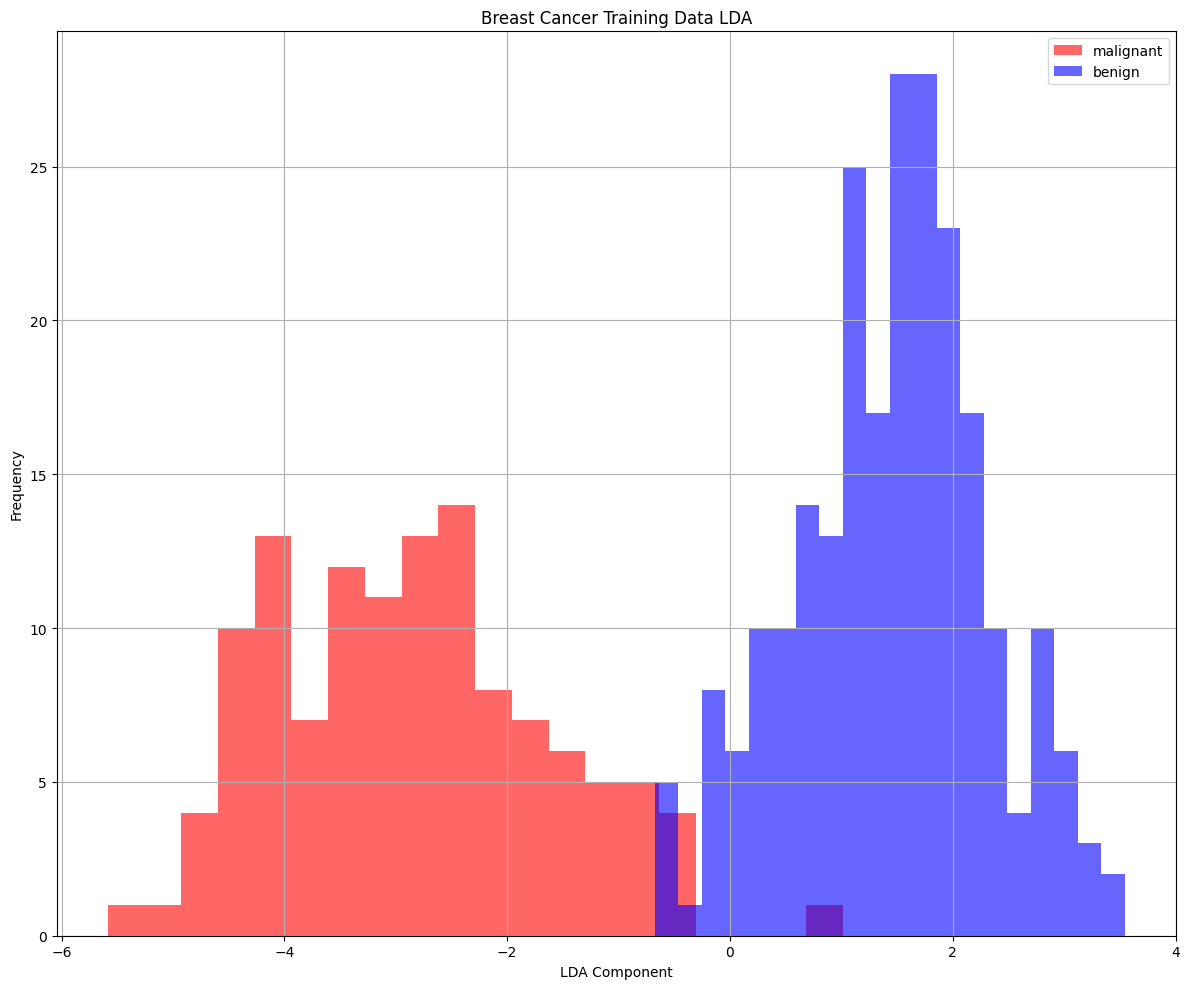

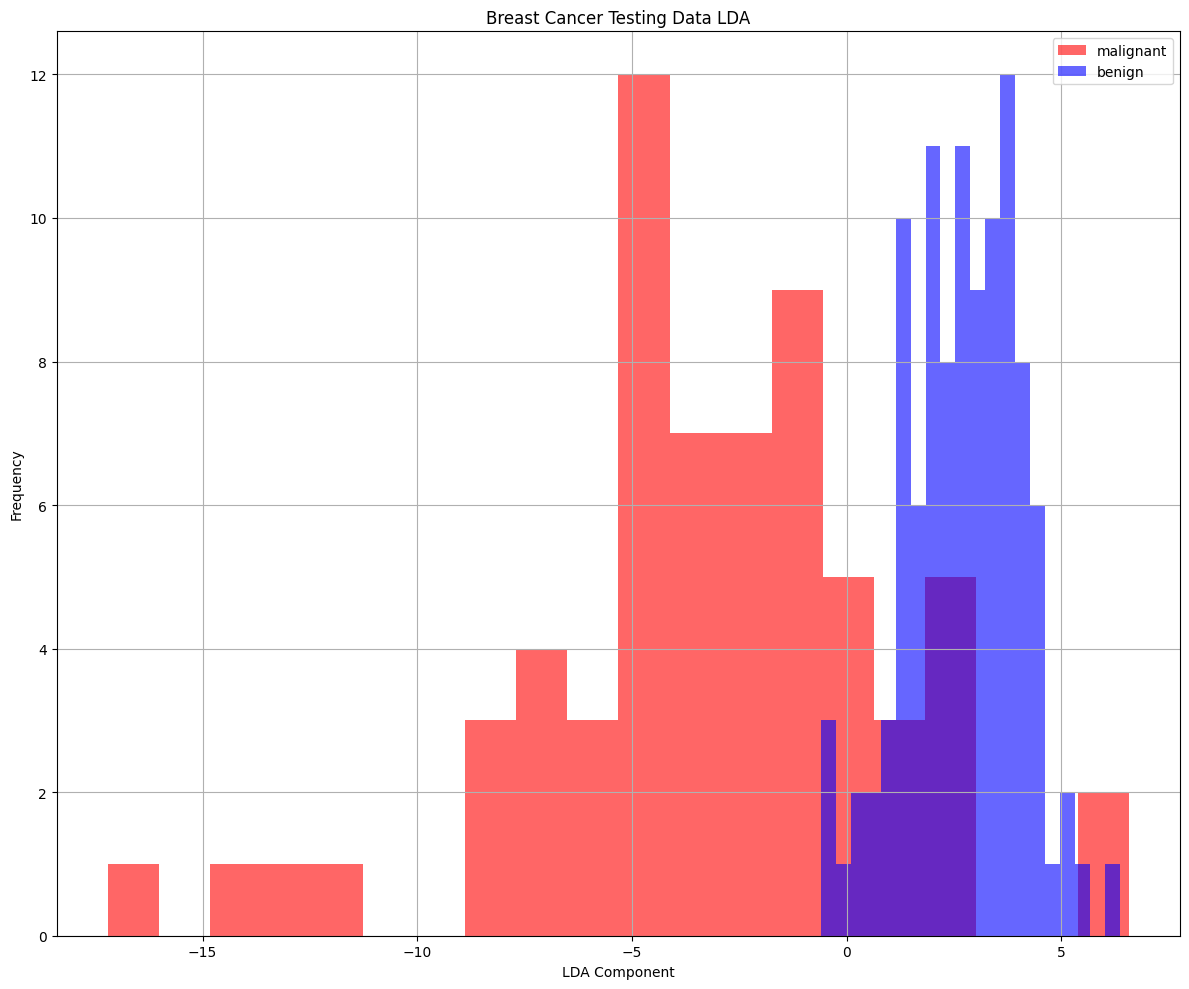

[I 2025-04-27 15:36:10,501] A new study created in memory with name: no-name-91fe1cbc-8a65-42ff-a9ee-2bd0c463e7fe
[I 2025-04-27 15:36:31,127] Trial 0 finished with value: 0.975076103500761 and parameters: {'n_estimators': 2492, 'max_depth': 6, 'learning_rate': 0.03259110279046184, 'subsample': 0.8809618787831435, 'colsample_bytree': 0.6311643323919087, 'gamma': 0.15239838149028073, 'reg_alpha': 3.897882694572717e-06, 'reg_lambda': 0.653415698483702}. Best is trial 0 with value: 0.975076103500761.
[I 2025-04-27 15:37:30,729] Trial 1 finished with value: 0.9751141552511415 and parameters: {'n_estimators': 9645, 'max_depth': 5, 'learning_rate': 0.16082881647425223, 'subsample': 0.8523073273331286, 'colsample_bytree': 0.9085408165277373, 'gamma': 4.281651327804567, 'reg_alpha': 5.900726736111587e-06, 'reg_lambda': 1.1427617144136877e-07}. Best is trial 1 with value: 0.9751141552511415.
[I 2025-04-27 15:38:00,639] Trial 2 finished with value: 0.9779299847792998 and parameters: {'n_estimator

Best trial:
Accuracy: 0.9862252663622527
Best hyperparameters:  {'n_estimators': 9256, 'max_depth': 9, 'learning_rate': 0.12707177644338252, 'subsample': 0.67169047135978, 'colsample_bytree': 0.8975160182404955, 'gamma': 0.6918635626251806, 'reg_alpha': 0.006435106817917363, 'reg_lambda': 7.346874353951068e-05}


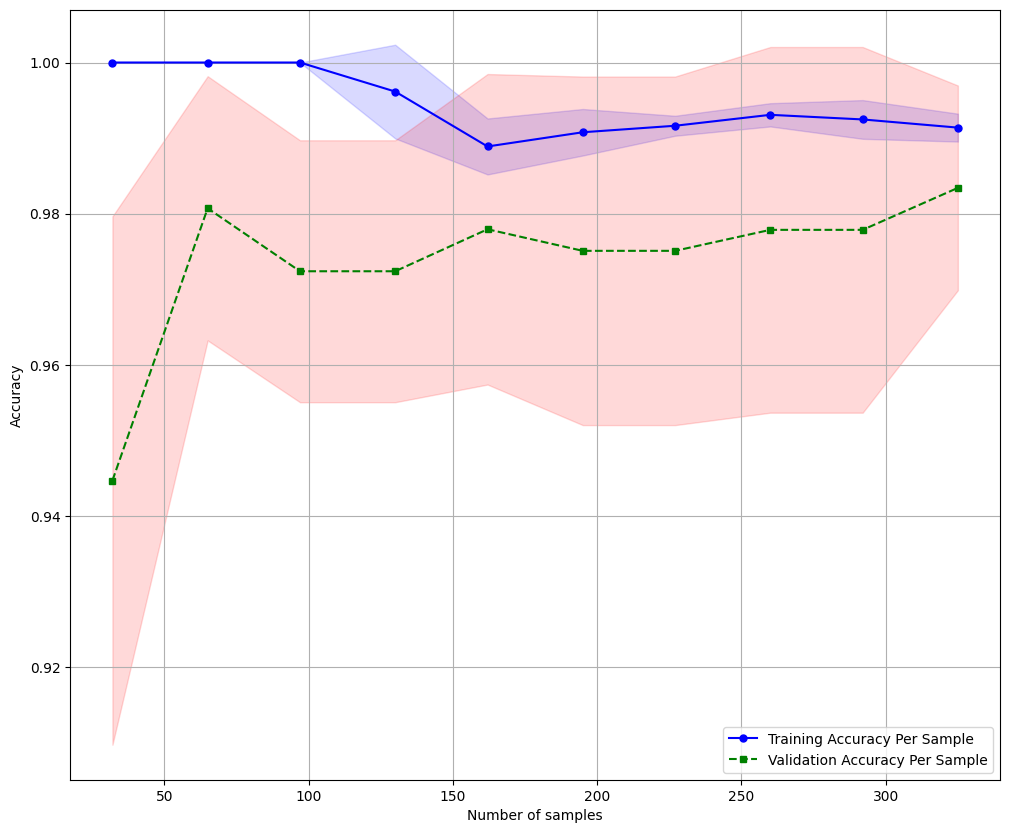

Confusion Matrix
[[ 50  14]
 [  1 106]]
Accuracy: 0.9123, Precision: 0.8833, Recall: 0.9907, F1: 0.9339, AUC: 0.9261


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)